## Assignment

You will be asked to work with precipitation data for  Boulder, Colorado, provided by the <a href="https://www.esrl.noaa.gov/psd/boulder/Boulder.mm.precip.html" target="_blank">U.S. National Oceanic and Atmospheric Administration (NOAA)</a>.

### Question 1: Import Python Packages

In the questions below, you will need to import the necessary `Python` packages to accomplish the following tasks: 

1. Download a CSV file using `earthpy.data.get_data()`.
2. Set your working directory to `~/earth-analytics`.
3. Import data into `pandas dataframes`.
4. Creating plots of your data using `matplotlib`.

In [1]:
# Import necessary Python packages

import os
import earthpy
import pandas as pd
import matplotlib.pyplot as plt

### DO NOT REMOVE LINES BELOW ###
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts

### Question 2: Download Data and Plot

1. Use `earthpy.data.get_data()` to download the following .csv file:
    * `boulder-precip-2007-to-2017-months-seasons.csv` from `url = https://ndownloader.figshare.com/files/12767933`
        * The data will download to `~/earth-analytics/data/earthpy-downloads/`.
        * This dataset contains a row for each month (starting with January through December) and contains a column for each year (2007 to 2017). 
        * More information on `earthpy.data.get_data()` available at <a href="https://earthpy.readthedocs.io/en/latest/api/earthpy.io.html#earthpy.io.Data.get_data" target="_blank">this link</a>.        
2. Import the data to a `pandas dataframe` and create a line plot for **2013** using `matplotlib`. 
    * Be sure to include:
        1. An appropriate plot title.
        2. Clear labels for the axes (including abbreviation for units of measurements where apppropriate).

In [2]:
earthpy.data.get_data(url="https://ndownloader.figshare.com/files/12767933")

'/home/jovyan/earth-analytics/data/earthpy-downloads/boulder-precip-2007-to-2017-months-seasons.csv'

In [3]:
precip_2007_to_2017_months = pd.read_csv("~/earth-analytics/data/earthpy-downloads/boulder-precip-2007-to-2017-months-seasons.csv")

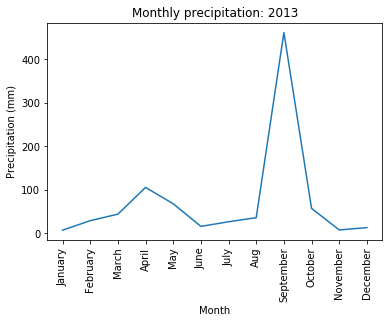

In [4]:
# Create plot for 2013
plt.plot(precip_2007_to_2017_months.months, precip_2007_to_2017_months.y2013)
plt.title("Monthly precipitation: 2013")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=90)

### DO NOT REMOVE LINE BELOW ###
ts_1_plot = nb.convert_axes(plt)

In [5]:
def run_test(func, points, *args, correct_message="default correct", error_message="default error", **kwargs):
    results = {"points": 0, "pass": False}
    score = 0
    try:
        fname = func.__name__
        results['description'] = fname
        func(*args, **kwargs)
    except Exception as e:
        results['message'] = error_message
        results['traceback'] = e
        pass
    else:
        results['pass'] = True
        results['message'] = correct_message
        results['points'] = points
    
    return results
   
def output_results(results):
    points = 0
    for r in results:
        points += r['points']
        print("Results for test '{}':".format(r['description']))
        if (r['pass']):
            print(" Pass! {msg} ({p} points)".format(msg=r['message'],p=r['points']))
        else:
            print(" Fail! {msg} ({p} points)".format(msg=r['message'],p=r['points']))
            print(" Traceback: {t}".format(t=r['traceback']))
    return points

In [6]:
# Locked Grading Cell - Homework Plot 1
hw_plot1 = ts.TimeSeriesTester(ts_1_plot)

results = []

plot_type_test = run_test(hw_plot1.assert_plot_type, 3, 'line', 
             correct_message="Your plot is indeed a line plot.",
             error_message="Check that your plot is a line plot.")
results.append(plot_type_test)

plot_x_lab_test = run_test(hw_plot1.assert_axis_label_contains, 2, axis="x", lst=["Month"],
                  correct_message="Your x axis label appropriately contains the word Month",
                  error_message="Check your x axis label for a more appropriate label")
results.append(plot_x_lab_test)

plot_y_lab_test = run_test(hw_plot1.assert_axis_label_contains, 2, axis="y", lst=["Precip", "mm"], 
                  correct_message="Your y axis label appropriately contains the word 'Precip' and identifies the units",
                  error_message="Check your y axis label for a more appropriate label with units identified.")
results.append(plot_y_lab_test)

plot_title_test = run_test(hw_plot1.assert_title_contains, 2, ["Month", "Precip", "2013"],
                   correct_message="Plot title appropriately contains the words 'Month', 'Precip', and '2013'",
                   error_message="Check your plot title words for a more appropriate title.")
results.append(plot_title_test)

# Create expected data
precip_2007_to_2017_months.reset_index(inplace=True)
precip_2013 = precip_2007_to_2017_months[["index", "y2013"]]

# Add test to ensure the df has the correct values
data_test = run_test(hw_plot1.assert_xydata, 6, xy_expected=precip_2013, 
                correct_message="Plot includes correct data",
                error_message="Check your plot data.",
                xcol="index",
                ycol="y2013")

results.append(data_test)

output_results(results)

Results for test 'assert_plot_type':
 Pass! Your plot is indeed a line plot. (3 points)
Results for test 'assert_axis_label_contains':
 Pass! Your x axis label appropriately contains the word Month (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your y axis label appropriately contains the word 'Precip' and identifies the units (2 points)
Results for test 'assert_title_contains':
 Pass! Plot title appropriately contains the words 'Month', 'Precip', and '2013' (2 points)
Results for test 'assert_xydata':
 Pass! Plot includes correct data (6 points)


15